In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
#shape of the numpy arrays
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


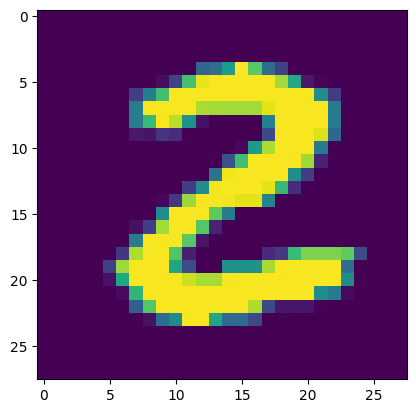

2


In [ ]:
#Displaying the image

plt.imshow(X_train[25])
plt.show()

#print the corresponding label
print(y_train[25])

In [ ]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [ ]:
#unique values in y_train
print(np.unique(y_train))

#unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#Scaling the values
X_train=X_train/255
X_test=X_test/255

In [ ]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
#Setting up the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='sigmoid')
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
#Training the neural network
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3598 - accuracy: 0.8988
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1613 - accuracy: 0.9521
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1192 - accuracy: 0.9639
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0963 - accuracy: 0.9714
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0779 - accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0682 - accuracy: 0.9787
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0582 - accuracy: 0.9813
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0505 - accuracy: 0.9842
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0440 - accuracy: 0.9854
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.039

In [ ]:
loss,accuracy = model.evaluate(X_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0961 - accuracy: 0.9722
0.9721999764442444


In [ ]:
print(X_test.shape)

(10000, 28, 28)


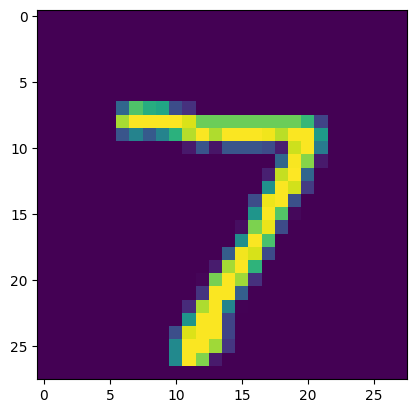

In [ ]:
#First data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
y_pred=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
print(y_pred.shape)

(10000, 50)


In [ ]:
print(y_pred[0])

[1.66758031e-01 2.83603968e-05 5.38013816e-01 9.85696435e-01
 6.07199837e-08 1.97036937e-01 2.71651892e-08 9.99998212e-01
 8.11591566e-01 6.65901303e-01 8.72232703e-11 7.64468433e-10
 9.47777135e-11 1.77141385e-10 5.50091092e-12 5.29594181e-11
 1.78163907e-11 3.73020677e-11 1.00970815e-10 2.30760550e-11
 3.05702642e-12 5.58450404e-11 7.12684980e-11 4.06139150e-11
 3.26305857e-11 1.02285617e-10 1.28247454e-10 3.45285918e-11
 6.92285326e-11 2.90039832e-11 2.70188594e-11 9.76337847e-12
 1.60579588e-11 2.05569034e-11 1.97028741e-10 5.70595585e-11
 1.01914442e-10 1.85487094e-11 1.04912565e-10 3.23183064e-10
 1.20607219e-10 7.42960582e-10 2.93086180e-11 7.47795437e-11
 3.70856262e-11 2.74256642e-11 3.22336574e-10 5.98338393e-11
 1.35276209e-12 3.87047729e-12]


In [ ]:
#Converting the prediction probabilities to class label

label_for_first_image = np.argmax(y_pred[0])
print(label_for_first_image)

7


In [ ]:
#Converting the prediction probabilities to class label for all the data points
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 5, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 1, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 966    0    1    1    1    4    2    1    4    0]
 [   0 1127    3    2    0    1    1    0    1    0]
 [   3    3  999    4    2    1    1    5   14    0]
 [   0    0    7  961    0   17    0    7    9    9]
 [   1    0    2    0  954    2    7    5    0   11]
 [   2    0    0   10    2  871    1    0    3    3]
 [   2    3    4    1    2    7  934    0    5    0]
 [   1    5    9    4    3    0    0  999    3    4]
 [   4    3    4    3    5    8    1    5  936    5]
 [   4    2    0    6   11    8    0    5    4  969]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

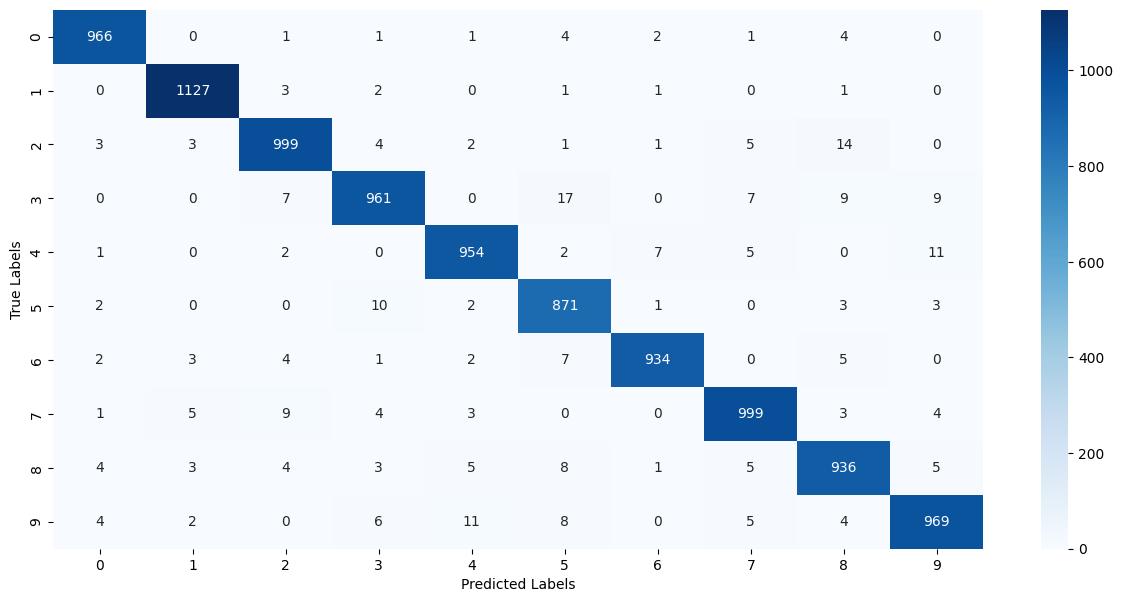

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [ ]:
input_image_path = '/content/sample_image.webp'
input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[250 250 250]
  [250 250 250]
  [198 198 198]
  ...
  [250 250 250]
  [255 255 255]
  [255 255 255]]

 [[198 198 198]
  [198 198 198]
  [  0   0   0]
  ...
  [198 198 198]
  [255 255 255]
  [255 255 255]]

 ...

 [[228 228 228]
  [228 228 228]
  [  0   0   0]
  ...
  [228 228 228]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]

 [[221 221 221]
  [221 221 221]
  [  0   0   0]
  ...
  [221 221 221]
  [255 255 255]
  [255 255 255]]]


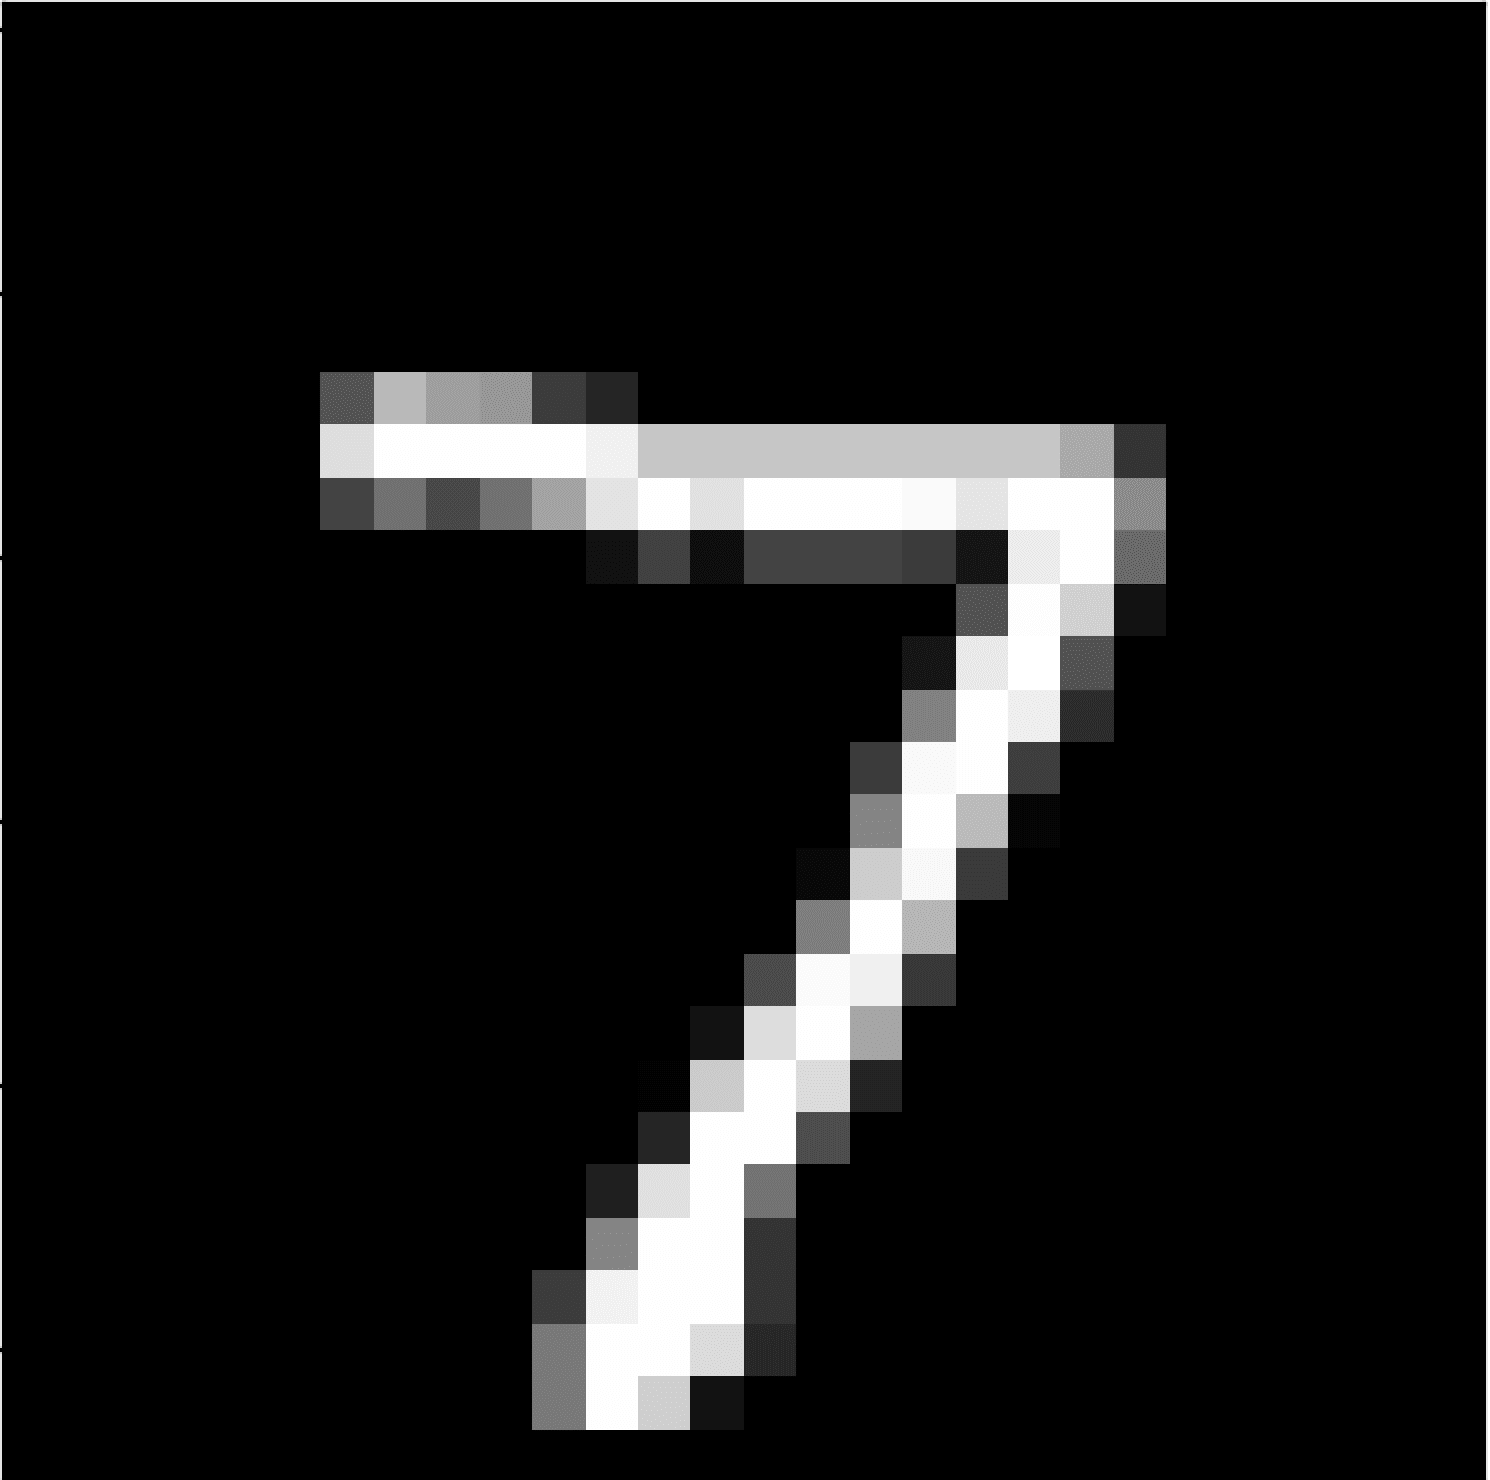

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(1480, 1490, 3)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(1480, 1490)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
type(input_image_resize)

numpy.ndarray

In [ ]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 40ms/step
[[1.62505984e-01 2.93831599e-05 5.32565296e-01 9.85901415e-01
  6.31586659e-08 2.00429380e-01 2.68679656e-08 9.99998212e-01
  8.07868958e-01 6.57408237e-01 8.93545793e-11 7.80890019e-10
  9.68239794e-11 1.84057769e-10 5.69131201e-12 5.44010392e-11
  1.84524115e-11 3.84972471e-11 1.03757364e-10 2.37831057e-11
  3.20318641e-12 5.73575562e-11 7.29619212e-11 4.18106869e-11
  3.36096151e-11 1.04570547e-10 1.34544778e-10 3.56681629e-11
  7.04596936e-11 2.97623245e-11 2.79168615e-11 1.02291231e-11
  1.64999871e-11 2.12664851e-11 2.03083134e-10 5.91532240e-11
  1.05216766e-10 1.91295174e-11 1.07763284e-10 3.30492633e-10
  1.25491603e-10 7.68301200e-10 3.04004356e-11 7.69208447e-11
  3.84826372e-11 2.79310828e-11 3.35431544e-10 6.11529508e-11
  1.40504372e-12 4.00855651e-12]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

7


Path of the image to be predicted:/content/sample_image.webp


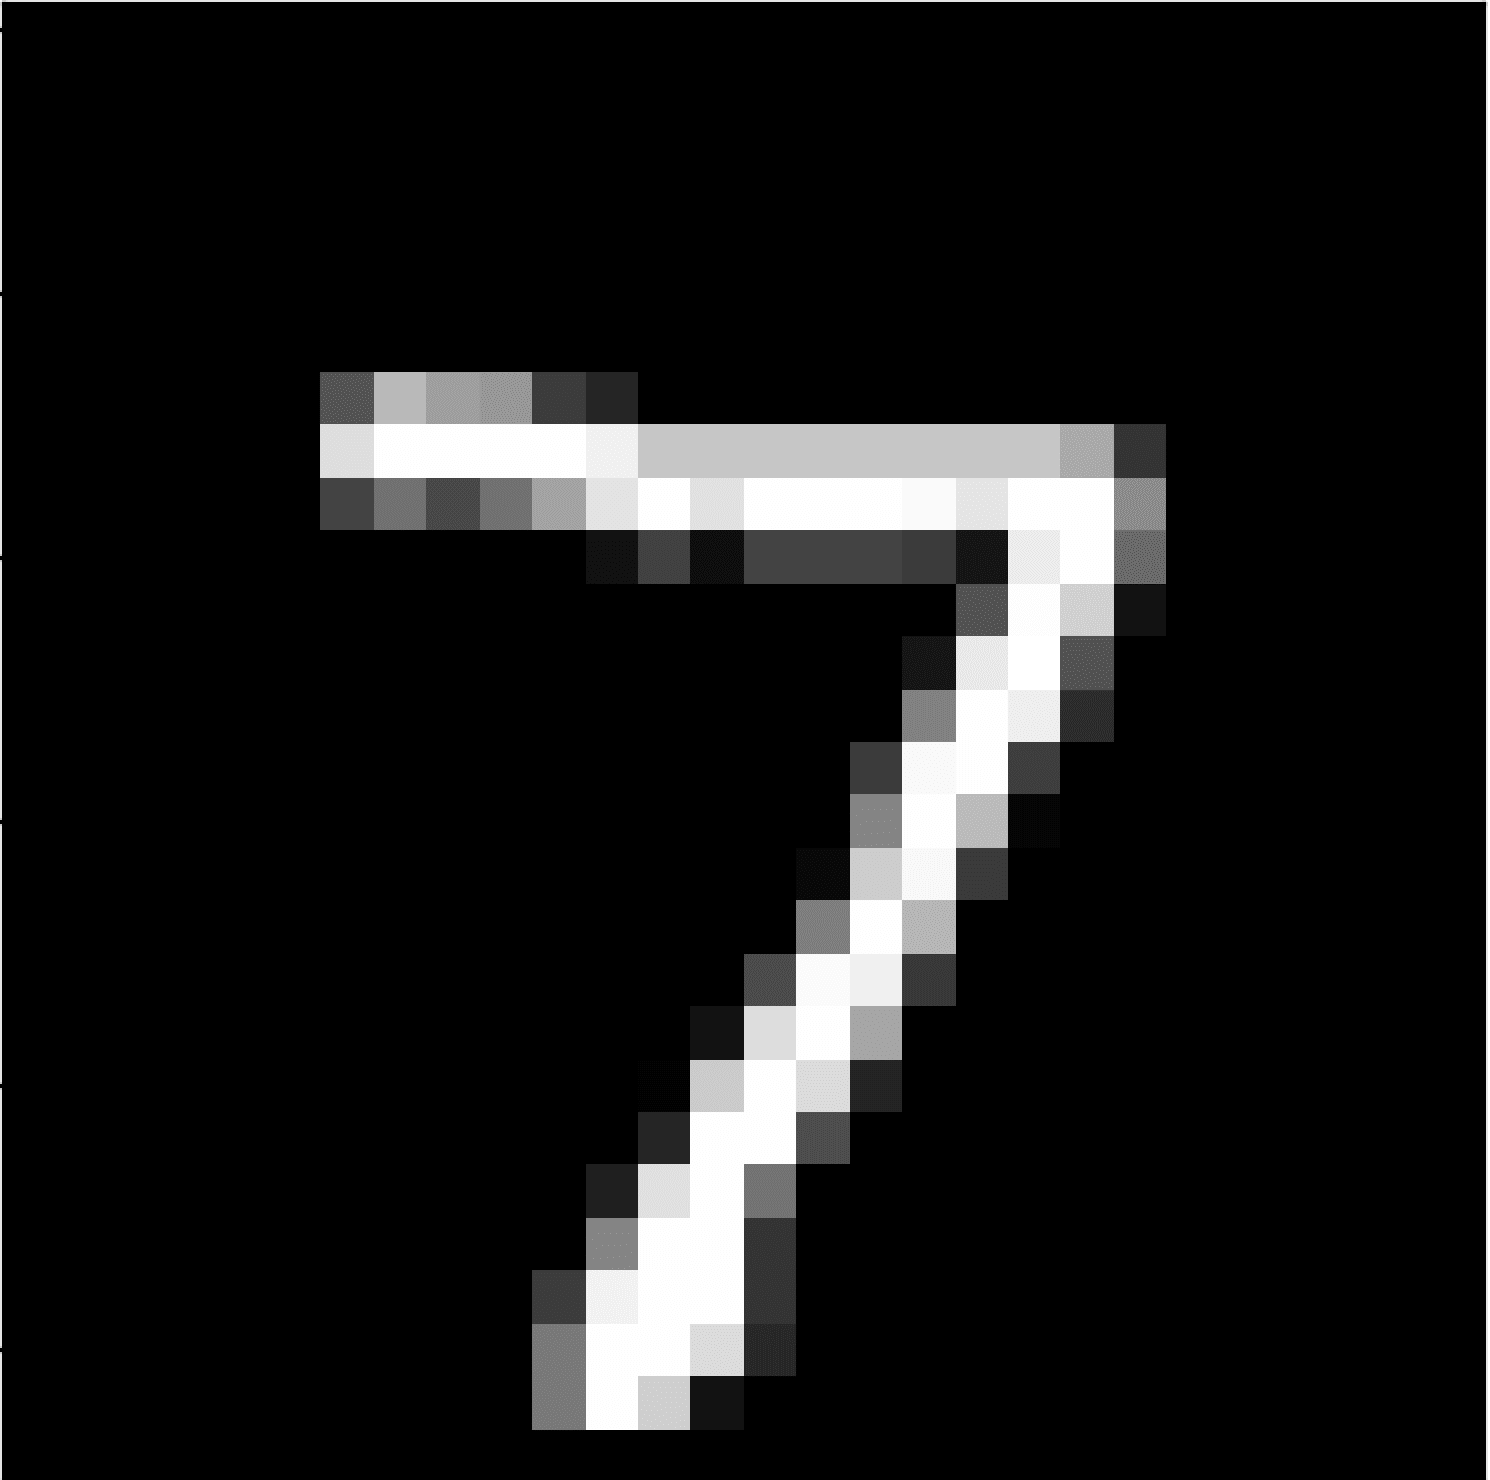

1/1 [==============================] - 0s 20ms/step
[[1.62505984e-01 2.93831599e-05 5.32565296e-01 9.85901415e-01
  6.31586659e-08 2.00429380e-01 2.68679656e-08 9.99998212e-01
  8.07868958e-01 6.57408237e-01 8.93545793e-11 7.80890019e-10
  9.68239794e-11 1.84057769e-10 5.69131201e-12 5.44010392e-11
  1.84524115e-11 3.84972471e-11 1.03757364e-10 2.37831057e-11
  3.20318641e-12 5.73575562e-11 7.29619212e-11 4.18106869e-11
  3.36096151e-11 1.04570547e-10 1.34544778e-10 3.56681629e-11
  7.04596936e-11 2.97623245e-11 2.79168615e-11 1.02291231e-11
  1.64999871e-11 2.12664851e-11 2.03083134e-10 5.91532240e-11
  1.05216766e-10 1.91295174e-11 1.07763284e-10 3.30492633e-10
  1.25491603e-10 7.68301200e-10 3.04004356e-11 7.69208447e-11
  3.84826372e-11 2.79310828e-11 3.35431544e-10 6.11529508e-11
  1.40504372e-12 4.00855651e-12]]
The Handwritten Digit is recognised as  7


In [ ]:
input_image_path = input('Path of the image to be predicted:')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale,(28,28))
input_image_scaled = input_image_resize/255
input_image_reshaped = np.reshape(input_image_scaled,[1,28,28])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognised as ',input_pred_label)